## Comenzamos con Analisis Exploratorio

- Importamos las funciones que vayamos creando:

In [1]:
import os
print(os.getcwd())

c:\BOOTCAMPASUS\EDA_entrega\src\notebooks


In [2]:
os.chdir('c:/BOOTCAMPASUS/EDA_entrega/src')

In [3]:
#os.chdir('c:/Users/Usuario/REPO_BOOTCAMP/EDA_entrega/src')


In [3]:
print(os.getcwd())

c:\BOOTCAMPASUS\EDA_entrega\src


In [4]:
# Importamos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from utils.funciones_eda import *

In [6]:
df_online_retail_2010 = pd.read_csv("./data/online_retail_2010.csv")
df_online_retail_2010.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Devolucion,Ventas,Precio_Total,Trimestres
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,3.900000,12346.0,United Kingdom,False,True,19.50,1
1,C493411,21539,RETRO SPOTS BUTTER DISH,1,2010-01-04 09:43:00,5.796827,14590.0,United Kingdom,True,False,5.80,1
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,3.900000,12346.0,United Kingdom,False,True,19.50,1
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,1.046759,12345.0,United Kingdom,False,True,1.05,1
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.834224,12345.0,United Kingdom,False,True,3.83,1


### Tabla de Variables

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Invoice|Numero de factura o ticket|||Hay numeros y letras|
|StockCode|Numero identificativo del producto||||
|Description|Nombre detallado del producto| | | |
|Quantity|Cantidad de producto adquirido o devuelto| | || |
|InvoiceDate| Fecha de la factura o ticket| | | |
|Price| Precio del articulo por unidad| | | |
|Customer_ID | Identificativo del cliente| | | |
|Country| Pais de donde procede el movimiento | | | |
|Devolucion| Devolucion| | | |
|Ventas| Ventas| | | |
|Precio_Total| Cuantia de la factura o ticket| | | |
|Trimestres| Trimestre al que pertenece el movimiento | | |Tenemos 4 trimestres|

In [7]:
# Cardinalidad
df_o_r_2010_tipificacion = pd.DataFrame([df_online_retail_2010.nunique(), df_online_retail_2010.nunique()/len(df_online_retail_2010) * 100, df_online_retail_2010.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                          1: "%_Card", 2: "Tipo"})
df_o_r_2010_tipificacion

,Card,%_Card,Tipo
Invoice,26164,5.451856,object
StockCode,4195,0.874122,object
Description,4037,0.841199,object
Quantity,514,0.107103,int64
InvoiceDate,23113,4.816111,object
Price,3840,0.80015,float64
Customer_ID,4259,0.887458,float64
Country,40,0.008335,object
Devolucion,2,0.000417,bool
Ventas,2,0.000417,bool


In [8]:
# Sigamos con la cardinalidad y los tipos:

cardinalidad(df_online_retail_2010, 10, 30)

,Columna,Cardinalidad,Porcentaje Cardinalidad,Tipo
0,Invoice,26164,5.451856,Numérica Discreta
1,StockCode,4195,0.874122,Numérica Discreta
2,Description,4037,0.841199,Numérica Discreta
3,Quantity,514,0.107103,Numérica Discreta
4,InvoiceDate,23113,4.816111,Numérica Discreta
5,Price,3840,0.800150,Numérica Discreta
6,Customer_ID,4259,0.887458,Numérica Discreta
7,Country,40,0.008335,Numérica Discreta
8,Devolucion,2,0.000417,Binaria
9,Ventas,2,0.000417,Binaria


|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Invoice|Numero de factura o ticket|Numerica Discreta|3|Hay numeros y letras|
|StockCode|Numero identificativo del producto|Numerica Discreta|1||
|Description|Nombre detallado del producto|Numerica Discreta |2 | |
|Quantity|Cantidad de producto adquirido o devuelto| Numerica Discreta|3 || |
|InvoiceDate| Fecha de la factura o ticket|Numerica Discreta |3| |
|Price| Precio del articulo por unidad| Numerica Discreta|3 | |
|Customer_ID | Identificativo del cliente|Numerica Discreta |2 | |
|Country| Pais de donde procede el movimiento |Numerica Discreta |0 | |
|Devolucion| Devolucion| Binaria|0 |True or False |
|Ventas| Ventas| Binaria|0 |True or False |
|Precio_Total| Cuantia de la factura o ticket|Numerica Discreta |0 | |
|Trimestres| Trimestre al que pertenece el movimiento | Categorica|0 |Tenemos 4 trimestres|

In [9]:
# Localizamos valores minimos, maximos...

df_online_retail_2010.describe()

,Quantity,Price,Customer_ID,Precio_Total,Trimestres
count,479910.000000,479910.000000,479910.000000,479910.000000,479910.000000
mean,12.633556,4.742286,14762.242112,37.213928,2.678969
std,108.094221,123.214806,1923.423031,1156.137438,1.144138
min,1.000000,-45517.340000,12345.000000,-45517.340000,1.000000
25%,1.000000,1.432385,12826.000000,3.890000,2.000000
50%,3.000000,2.257033,14646.000000,10.700000,3.000000
75%,12.000000,4.152750,16469.000000,20.280000,4.000000
max,19152.000000,8859.906667,18287.000000,446142.630000,4.000000


In [10]:
def eliminar_outliers_iqr2(df, columnas, factor=3.5, graficar=False):
    """
    Reemplaza outliers con NaN en múltiples columnas usando IQR sin eliminar filas completas.
    
    Parámetros:
    - df: DataFrame de entrada.
    - columnas: (list) Lista de nombres de columnas a procesar.
    - factor: (float) Factor multiplicador del IQR (por defecto: 3.5).
    - graficar: (bool) Mostrar boxplots antes y después (opcional).

    Retorna:
    - DataFrame con outliers reemplazados por NaN solo en las columnas seleccionadas.
    """
    df_limpio = df.copy()
    
    for columna in columnas:
        # Calcular Q1, Q3 e IQR
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Definir límites
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Reemplazar outliers con NaN
        df_limpio.loc[(df[columna] < lower_bound) | (df[columna] > upper_bound), columna] = np.nan

        # Graficar boxplots (opcional)
        if graficar:
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            df[columna].plot(kind='box', ax=axes[0], title=f"Antes de eliminar outliers ({columna})")
            df_limpio[columna].plot(kind='box', ax=axes[1], title=f"Después de eliminar outliers ({columna})")
            plt.show()

    return df_limpio



In [11]:
columnas_outliers = ["Price", "Precio_Total", "Quantity"]

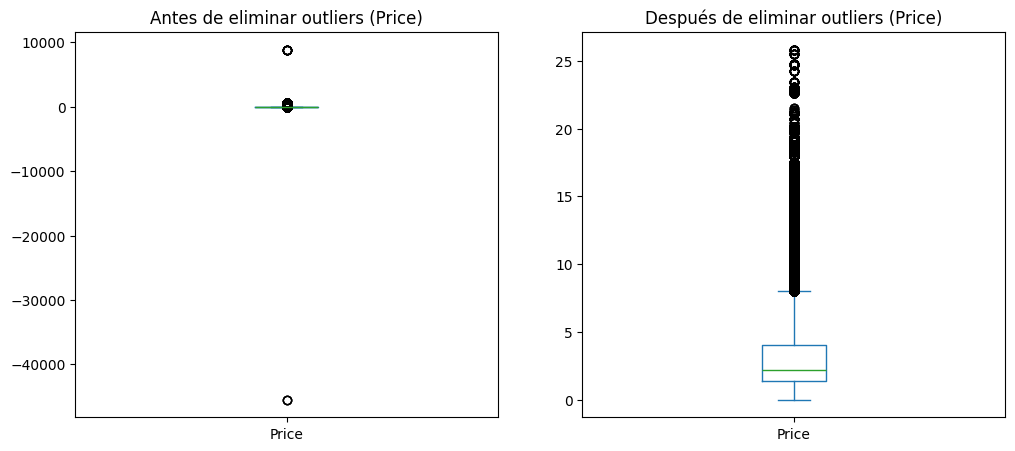

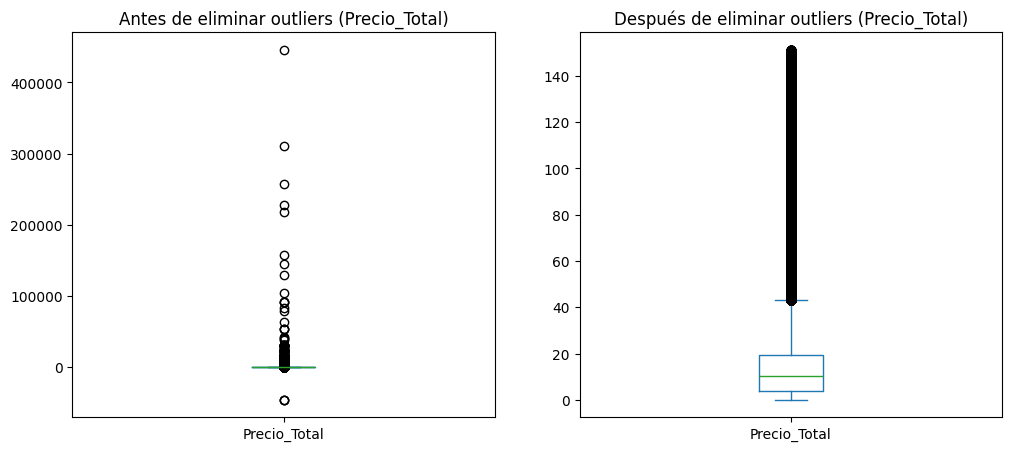

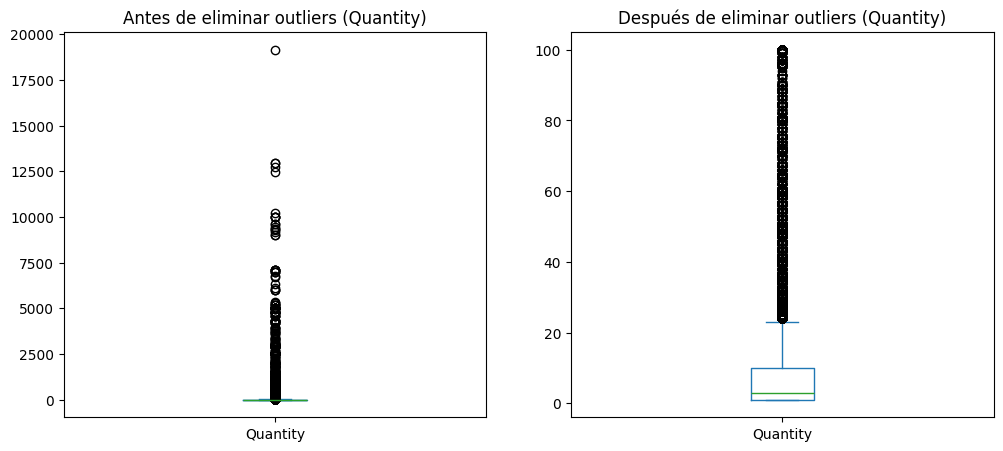

In [12]:
df_limpio = eliminar_outliers_iqr2(
    df=df_online_retail_2010, 
    columnas=columnas_outliers, 
    factor=8, 
    graficar=True  
)

In [13]:
df_limpio.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Devolucion,Ventas,Precio_Total,Trimestres
0,493410,TEST001,This is a test product.,5.0,2010-01-04 09:24:00,3.900000,12346.0,United Kingdom,False,True,19.50,1
1,C493411,21539,RETRO SPOTS BUTTER DISH,1.0,2010-01-04 09:43:00,5.796827,14590.0,United Kingdom,True,False,5.80,1
2,493412,TEST001,This is a test product.,5.0,2010-01-04 09:53:00,3.900000,12346.0,United Kingdom,False,True,19.50,1
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1.0,2010-01-04 09:54:00,1.046759,12345.0,United Kingdom,False,True,1.05,1
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1.0,2010-01-04 09:54:00,3.834224,12345.0,United Kingdom,False,True,3.83,1


In [14]:
# Nulos despues de la funcion
print(df_limpio.isna().sum())


Invoice             0
StockCode           0
Description         0
Quantity         5753
InvoiceDate         0
Price            3653
Customer_ID         0
Country             0
Devolucion          0
Ventas              0
Precio_Total    12248
Trimestres          0
dtype: int64


In [15]:
df_limpio = df_limpio.dropna(subset=["Price", "Precio_Total", "Quantity"])

In [16]:
df_limpio.Price = df_limpio.Price.round(2)

In [17]:
# Limpiado los outliers
df_limpio

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Devolucion,Ventas,Precio_Total,Trimestres
0,493410,TEST001,This is a test product.,5.0,2010-01-04 09:24:00,3.90,12346.0,United Kingdom,False,True,19.50,1
1,C493411,21539,RETRO SPOTS BUTTER DISH,1.0,2010-01-04 09:43:00,5.80,14590.0,United Kingdom,True,False,5.80,1
2,493412,TEST001,This is a test product.,5.0,2010-01-04 09:53:00,3.90,12346.0,United Kingdom,False,True,19.50,1
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1.0,2010-01-04 09:54:00,1.05,12345.0,United Kingdom,False,True,1.05,1
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1.0,2010-01-04 09:54:00,3.83,12345.0,United Kingdom,False,True,3.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...
479905,538171,22271,FELTCRAFT DOLL ROSIE,2.0,2010-12-09 20:01:00,3.21,17530.0,United Kingdom,False,True,6.41,4
479906,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1.0,2010-12-09 20:01:00,3.95,17530.0,United Kingdom,False,True,3.95,4
479907,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1.0,2010-12-09 20:01:00,4.02,17530.0,United Kingdom,False,True,4.02,4
479908,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2.0,2010-12-09 20:01:00,4.14,17530.0,United Kingdom,False,True,8.28,4


In [18]:
# Pongamos la columna Quantity como int
df_limpio.Quantity = df_limpio.Quantity.astype(int)

In [19]:
df_limpio.sample(1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Devolucion,Ventas,Precio_Total,Trimestres
137889,506842,47567B,TEA TIME KITCHEN APRON,2,2010-05-04 14:07:00,6.1,16938.0,United Kingdom,False,True,12.19,2


In [20]:
df_limpio.Country.value_counts()

Country
United Kingdom          430900
EIRE                      8367
Germany                   7267
France                    5075
Netherlands               1628
Switzerland               1075
Belgium                    975
Portugal                   965
Spain                      939
Channel Islands            818
Italy                      685
Sweden                     668
Australia                  532
Austria                    474
Greece                     454
United Arab Emirates       364
Cyprus                     345
Finland                    337
Norway                     332
Denmark                    328
Unspecified                307
USA                        237
Japan                      197
Poland                     171
Malta                      167
Lithuania                  153
Singapore                  115
RSA                        108
Bahrain                    106
Canada                      77
Iceland                     71
Israel                      68


In [121]:
# df_limpio.to_csv("online_retail_limpiado.csv", index=False)

In [92]:
# for trimestre in range(1,5):
    df_trimestre = df_limpio[df_limpio["Trimestres"] == trimestre]

    file_name = f"online_retail_Q{trimestre}.csv"
    df_trimestre.to_csv(file_name, index=False)
    print(f"Dataset del trimestre {trimestre} ha sido exportado como {file_name}")

Dataset del trimestre 1 ha sido exportado como online_retail_Q1.csv
Dataset del trimestre 2 ha sido exportado como online_retail_Q2.csv
Dataset del trimestre 3 ha sido exportado como online_retail_Q3.csv
Dataset del trimestre 4 ha sido exportado como online_retail_Q4.csv


## Lo tenemos todo en orden para empezar a pintar graficas y sacar conclusiones.
    - No divagaremos e iremos directamente a por nuestros objetivos/hipótesis

## **· EL Q4 FUE EL TRIMESTRE CON MAS VENTAS.**


In [5]:
df_analisis = pd.read_csv("./data/online_retail_limpiado.csv")

In [7]:
df_filtro_ventas_true = df_analisis[df_analisis.Ventas == True]

ventas_trimestre_suma = df_filtro_ventas_true.groupby("Trimestres")["Precio_Total"].sum()

print(ventas_trimestre_suma)

Trimestres
1    1475439.82
2    1640238.06
3    1703022.62
4    2295187.36
Name: Precio_Total, dtype: float64


C:\Users\lukat\AppData\Local\Temp\ipykernel_8268\1211961141.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(


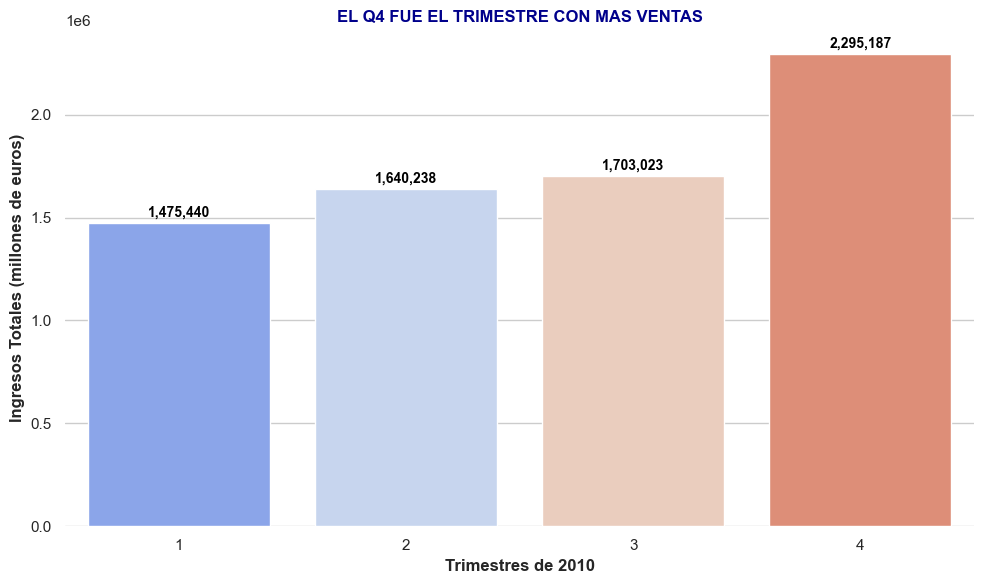

In [8]:
sns.set(style="whitegrid")
colores = sns.color_palette("coolwarm", len(ventas_trimestre_suma))

plt.figure(figsize=(10, 6))
barras = sns.barplot(
    x=ventas_trimestre_suma.index, 
    y=ventas_trimestre_suma.values, 
    palette=colores
)
for index, value in enumerate(ventas_trimestre_suma.values):
    plt.text(x=index, y=value + 50000, s=f"{value:,.0f}",
             color='black', ha='center', va='center', fontsize=10, fontweight='bold')
plt.xlabel("Trimestres de 2010", fontsize = 12, fontweight="bold")
plt.ylabel("Ingresos Totales (millones de euros)", fontsize=12, fontweight="bold")
plt.title("EL Q4 FUE EL TRIMESTRE CON MAS VENTAS", fontweight = "bold", color = "darkblue")
sns.despine(left=True, bottom=True)
plt.tight_layout()


## **- Reino Unido es el país que más nos compra**

In [9]:
ventas_paises = df_filtro_ventas_true.groupby("Country")["Precio_Total"].sum()

In [10]:
top_5_paises = ventas_paises.sort_values(ascending=False).head(5)

In [11]:
top_5_paises.values

array([6248038.69,  223331.68,  174266.91,  115054.53,   62271.91])

C:\Users\lukat\AppData\Local\Temp\ipykernel_8268\2858721629.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_5_paises.values, y = top_5_paises.index, palette= colores_top_5_paises)


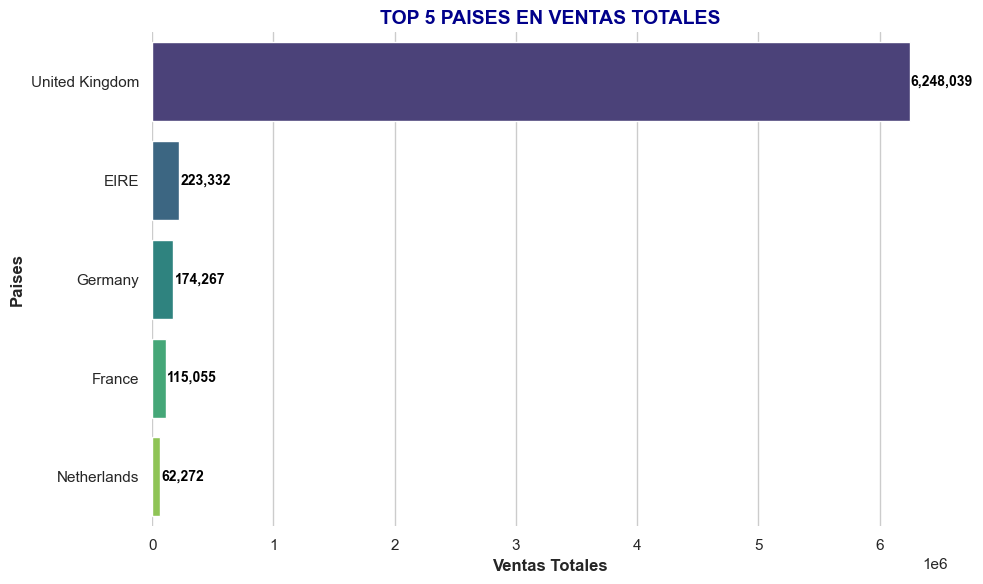

In [12]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(10, 6))
colores_top_5_paises = sns.color_palette("viridis", len(top_5_paises))

sns.barplot(x = top_5_paises.values, y = top_5_paises.index, palette= colores_top_5_paises)

for index, value in enumerate(top_5_paises.values):
    plt.text(x=value + 10000, y= index, s=f"{value:,.0f}",
             color='black', va='center', fontsize=10, fontweight='bold')
    
plt.xlabel("Ventas Totales", fontsize = 12, fontweight="bold")
plt.ylabel("Paises", fontsize=12, fontweight="bold")
plt.title("TOP 5 PAISES EN VENTAS TOTALES", fontsize = 14, fontweight = "bold", color = "darkblue")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


## **- Las devoluciones son un 5% frente a las ventas.**

In [13]:
total_ventas = len(df_analisis[df_analisis["Ventas"] == True])
total_devoluciones = len(df_analisis[df_analisis["Devolucion"] == True])

In [14]:
ventas_porcentaje = (total_ventas / len(df_analisis)) * 100
devoluciones_porcentaje = (total_devoluciones / len(df_analisis)) * 100

In [15]:
data_porcentaje = pd.DataFrame({
    "Categoria" : ["Ventas", "Devolucion"],
    "Porcentaje" : [ventas_porcentaje, devoluciones_porcentaje]
})

Text(0.5, 1.0, 'Porcentaje de Devoluciones frente a Ventas')

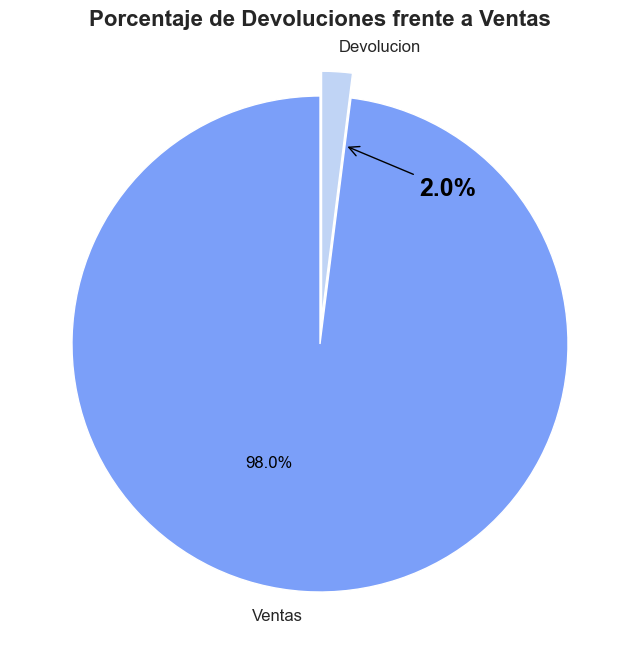

In [16]:
plt.figure(figsize=(8, 9))
plt.pie(data_porcentaje["Porcentaje"], labels=data_porcentaje["Categoria"], 
        startangle=90, colors=colores, explode=[0, 0.1], shadow=False, textprops={"fontweight" : "light", "fontsize":12}, pctdistance=0.8,)
plt.annotate(   
    "2.0%",
    xy=(0.1, 0.8),
    xytext=(0.4, 0.6),
    fontsize=18, fontweight="bold", color="black",
    arrowprops=dict(arrowstyle="->", lw=1, color="black")
)
plt.annotate(   
    "98.0%",
    xy=(0.0, 0.0),
    xytext=(-0.3, -0.5),
    fontsize=12, color="black"
)
plt.title("Porcentaje de Devoluciones frente a Ventas", fontsize=16, fontweight='bold')

## **Saber mas**

### - Cual es el producto mas vendido y su proyeccion durante el año

In [17]:
# df_q1 = pd.read_csv("./data/online_retail_Q1.csv")
# df_q2 = pd.read_csv("./data/online_retail_Q2.csv")
# df_q3 = pd.read_csv("./data/online_retail_Q3.csv")
# df_q4 = pd.read_csv("./data/online_retail_Q4.csv")

In [29]:
# Cuando hablamos de mas vendido, hablamos de mas cantidad
ventas_true = df_analisis[df_analisis["Ventas"] == True]

producto_mas_vendido = ventas_true.groupby("StockCode")["Quantity"].sum()
stockcode_max = producto_mas_vendido.idxmax()
cantidad_max = producto_mas_vendido.max()
print(F"El Stockcode mas vendido es {stockcode_max} con un total de {cantidad_max} unidades")

El Stockcode mas vendido es 85123A con un total de 30446 unidades


In [22]:
stockcode_objetivo = "85123A"

df_stockcode = df_analisis[df_analisis.StockCode == stockcode_objetivo]

evolucion_stockcode = df_stockcode.groupby("Trimestres")["Quantity"].sum().reset_index()
evolucion_stockcode

,Trimestres,Quantity
0,1,8184
1,2,7388
2,3,7800
3,4,7356


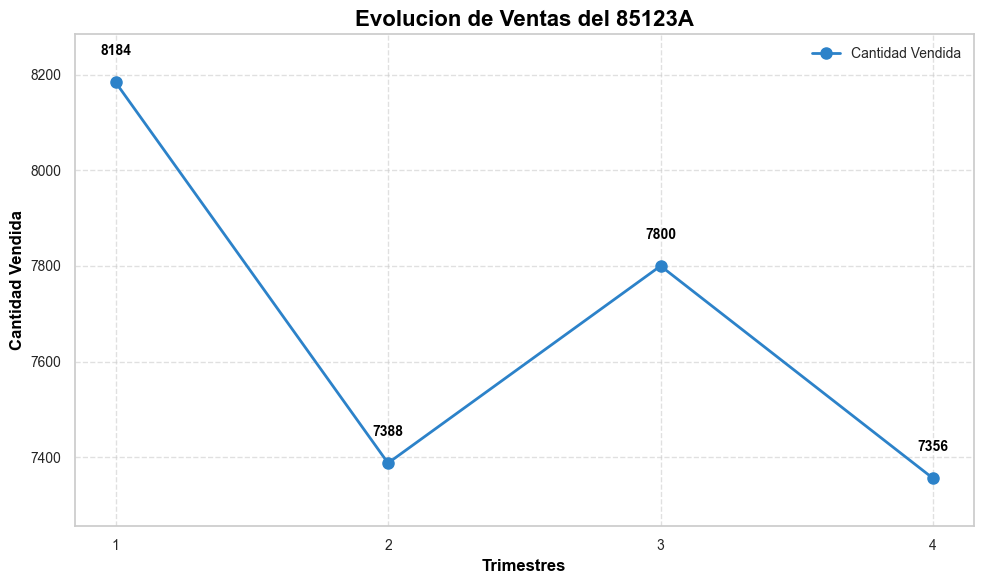

In [31]:
plt.figure(figsize=(10,6))
plt.plot(evolucion_stockcode["Trimestres"], evolucion_stockcode["Quantity"],
         marker = "o", linestyle = "-", color = "#2C82C9", linewidth = 2, markersize = 8, label = "Cantidad Vendida")


y_min, y_max = evolucion_stockcode["Quantity"].min(), evolucion_stockcode["Quantity"].max()
plt.ylim(y_min - 100, y_max + 100)

for i, value in enumerate(evolucion_stockcode["Quantity"]):
    plt.text(evolucion_stockcode["Trimestres"][i], value + 50, f"{value}",
             ha = "center", va = "bottom", fontsize = 10, fontweight = "bold", color = "black")
    
plt.title("Evolucion de Ventas del 85123A", fontsize = 16, fontweight = "bold", color = "black")
plt.xlabel("Trimestres", fontsize = 12, fontweight = "bold", color = "black")
plt.ylabel("Cantidad Vendida", fontsize = 12, fontweight = "bold", color = "black")

plt.grid(visible=True, linestyle="--", alpha=0.6)

plt.xticks(evolucion_stockcode["Trimestres"], fontsize=10, fontweight="light")
plt.yticks(fontsize=10)

plt.legend(loc="upper right", fontsize = 10, frameon = False)
plt.tight_layout()
plt.show()

In [34]:
# Vemos que descripcion tiene este codigo:

df_analisis[df_analisis["StockCode"] == "85123A"].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Devolucion,Ventas,Precio_Total,Trimestres
59,C493430,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-01-04 11:43:00,3.04,14680.0,United Kingdom,True,False,3.04,1
86,493432,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-01-04 12:30:00,3.04,14680.0,United Kingdom,False,True,97.21,1
395,C493445,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2010-01-04 14:00:00,3.04,16296.0,United Kingdom,True,False,6.08,1


### - Producto mas devuelto y visto por Trimestres

In [28]:
devoluciones_true = df_analisis[df_analisis["Devolucion"] == True]
producto_mas_devuelto = devoluciones_true.groupby("StockCode")["Quantity"].sum()

stockcode_devoluciones_max = producto_mas_devuelto.idxmax()
cantidad_devoluciones_max = producto_mas_devuelto.max()
print(f"El StockCode mas devuelto es {stockcode_devoluciones_max} con un total de {cantidad_devoluciones_max} unidades")

El StockCode mas devuelto es 79323W con un total de 752 unidades


In [30]:
stockcode_objetivo_devoluciones = "79323W"

df_stockcode_devoluciones = df_analisis[df_analisis.StockCode == stockcode_objetivo_devoluciones]

evolucion_stockcode_devoluciones = df_stockcode_devoluciones.groupby("Trimestres")["Quantity"].sum().reset_index()
evolucion_stockcode_devoluciones

,Trimestres,Quantity
0,1,700
1,2,820
2,3,30
3,4,4


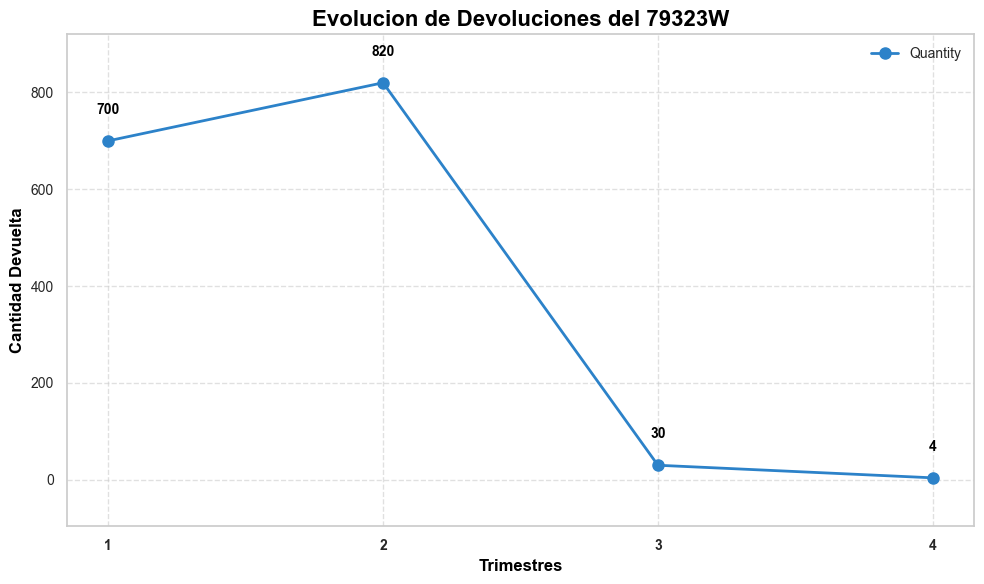

In [35]:
graficar_evolucion(evolucion_stockcode_devoluciones, x_col="Trimestres", y_col="Quantity", titulo="Evolucion de Devoluciones del 79323W",xlabel="Trimestres", ylabel="Cantidad Devuelta")

In [37]:
# Vemos que descripcion tiene este codigo:

df_analisis[df_analisis["StockCode"]== "79323W"].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Devolucion,Ventas,Precio_Total,Trimestres
315,493443,79323W,WHITE CHERRY LIGHTS,1,2010-01-04 13:39:00,6.82,14527.0,United Kingdom,False,True,6.82,1
1606,493721,79323W,WHITE CHERRY LIGHTS,1,2010-01-06 10:53:00,6.82,17362.0,United Kingdom,False,True,6.82,1
1816,493800,79323W,WHITE CHERRY LIGHTS,12,2010-01-07 11:16:00,6.82,18094.0,United Kingdom,False,True,81.86,1


### - Precio medio de compra por Factura/Ticket

In [43]:
ticket_medio_por_invoice = ventas_true.groupby('Invoice')['Precio_Total'].mean().reset_index()
ticket_medio_por_invoice


,Invoice,Precio_Total
0,493410,19.500000
1,493412,19.500000
2,493413,1.966667
3,493414,62.793333
4,493427,16.750556
...,...,...
18738,538167,14.043200
18739,538168,12.311333
18740,538169,8.006154
18741,538170,14.900800


In [44]:
ticket_medio_por_invoice = ticket_medio_por_invoice.rename(columns={"Precio_Total": "Ticket_Medio"})

In [45]:
ticket_medio_global = ventas_true.Precio_Total.mean()

In [47]:
round(ticket_medio_global,2)

np.float64(15.62)

### - El pais que mas devuelve